### Rolling predictions 

Comparing results on scikit tree & forest, prophet, SARIMA and craft on energy time series

We start by feeding the model 2 months of data, and ask them to predict 1 week

In [2]:
import pandas as pd
import numpy as np
import subprocess
import json
import benchmark_tools as abt
import pickle

In [24]:
import logging
import warnings
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

In [25]:
data = pd.read_csv('data/ampds_power_30T.csv')
data.index = pd.to_datetime(data.date, unit="s")
data = data.dropna().drop('date',1)
#Adding temperature information
temp = pd.read_csv('data/ampds_temp_30T.csv', parse_dates=['date'])
temp.index = pd.to_datetime(temp.date, unit='s')
temp = temp.drop('date',1)
data = data.merge(temp, left_index=True, right_index=True)
data.index.freq = '30T'

In [26]:
data.index.values[0], data.index.values[-1]

(numpy.datetime64('2012-04-01T07:00:00.000000000'),
 numpy.datetime64('2014-04-01T06:30:00.000000000'))

In [27]:
data.head()

,load,temp
date,,
2012-04-01 07:00:00,1947.400000,4.7
2012-04-01 07:30:00,1269.766667,4.7
2012-04-01 08:00:00,1645.300000,5.3
2012-04-01 08:30:00,845.666667,5.3
2012-04-01 09:00:00,1584.966667,5.9


In [28]:
print('{} semaines dans les données'.format(round((data.index[-1] - data.index[0]).days/7,2)))

104.14 semaines dans les données


Craft ai predictions for week n° 9


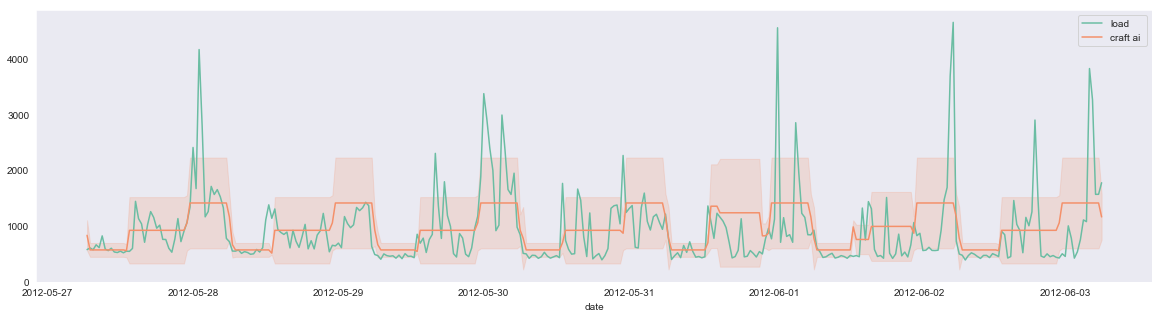

Model predictions for week n° 9


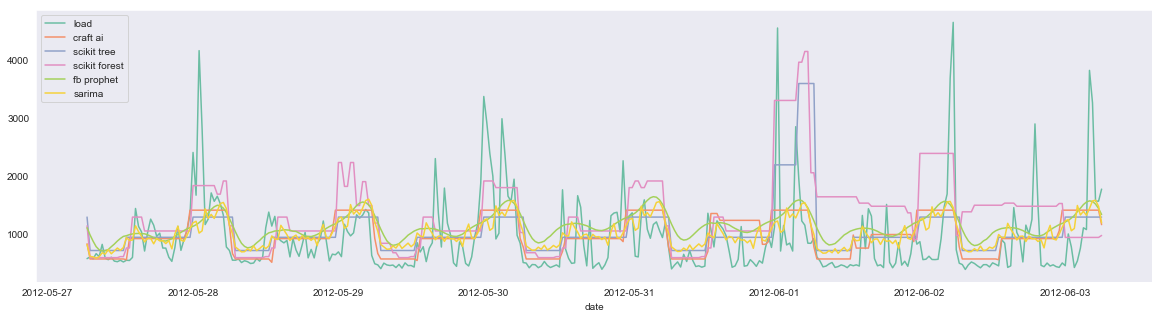

                 mae   mape   rmse        r2  week
ids                                               
scikit tree    447.0  56.16  676.0 -0.060347     9
scikit forest  616.0  88.32  850.0 -0.673876     9
prophet        475.0  67.57  627.0  0.088827     9
sarima model   398.0  51.34  587.0  0.202504     9
craft ai       374.0  45.45  579.0  0.223178     9
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    434.0  43.64  691.0  0.131401    10
scikit forest  443.0  42.37  737.0  0.013209    10
prophet        433.0  44.34  694.0  0.123101    10
sarima model   452.0  48.02  694.0  0.124727    10
craft ai       450.0  45.09  695.0  0.121547    10
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    440.0  77.80  514.0 -0.717514    11
scikit forest  387.0  65.76  482.0 -0.510701    11
prophet        453.0  81.52  519.0 -0.755164    11
sarima model   447.0  78.76  51

C:\Users\Claire\AppData\Local\Continuum\anaconda3\envs\energykit\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                 mae   mape   rmse        r2  week
ids                                               
scikit tree    436.0  56.37  615.0  0.118865    12
scikit forest  406.0  47.94  617.0  0.112375    12
prophet        377.0  35.61  648.0  0.021165    12
sarima model   396.0  47.64  608.0  0.137679    12
craft ai       411.0  51.38  600.0  0.159695    12
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    403.0  40.34  688.0  0.220446    13
scikit forest  447.0  44.86  759.0  0.049849    13
prophet        377.0  29.40  754.0  0.062790    13
sarima model   370.0  32.49  707.0  0.175117    13
craft ai       380.0  35.54  697.0  0.200206    13
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    308.0  39.14  470.0  0.185083    14
scikit forest  334.0  41.16  528.0 -0.026764    14
prophet        389.0  54.74  516.0  0.018682    14
sarima model   300.0  36.76  46

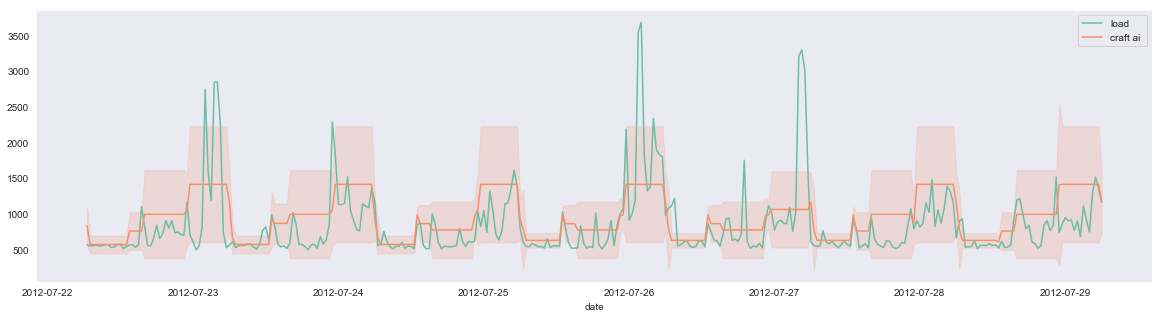

Model predictions for week n° 17


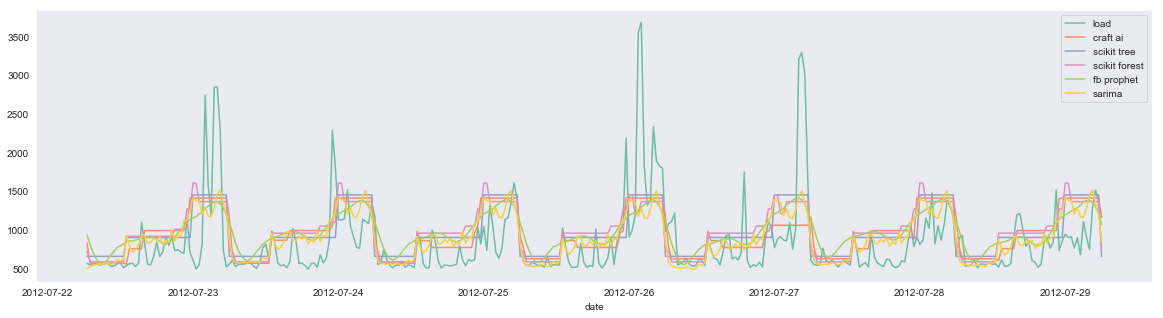

                 mae   mape   rmse        r2  week
ids                                               
scikit tree    300.0  37.18  432.0  0.223659    17
scikit forest  311.0  38.76  451.0  0.151156    17
prophet        298.0  37.98  424.0  0.249515    17
sarima model   255.0  29.55  406.0  0.311725    17
craft ai       278.0  33.41  432.0  0.223433    17
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    333.0  33.04  615.0  0.119331    18
scikit forest  335.0  31.51  658.0 -0.008294    18
prophet        321.0  30.40  607.0  0.141307    18
sarima model   305.0  27.72  606.0  0.144380    18
craft ai       326.0  32.92  606.0  0.144160    18
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    299.0  30.52  431.0  0.332894    19
scikit forest  297.0  30.37  428.0  0.341889    19
prophet        296.0  29.80  432.0  0.329854    19
sarima model   279.0  26.85  41

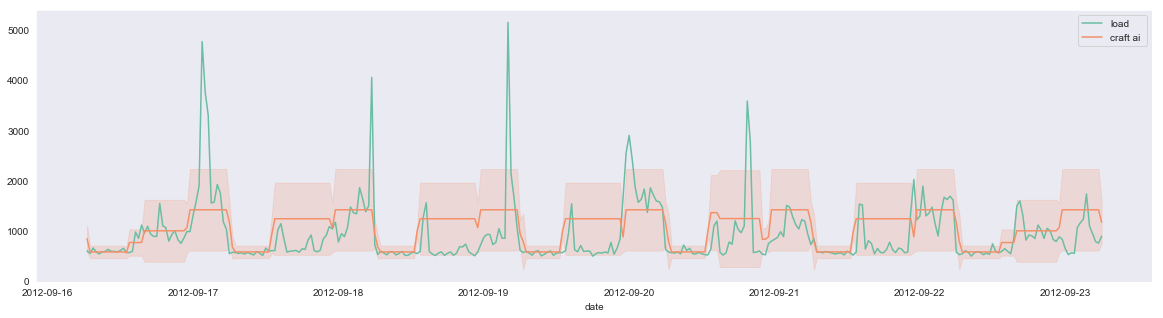

Model predictions for week n° 25


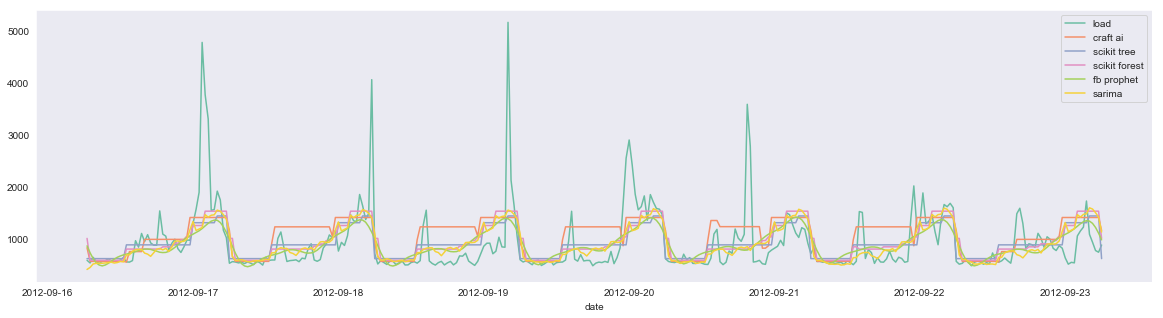

                 mae   mape   rmse        r2  week
ids                                               
scikit tree    282.0  29.83  508.0  0.303597    25
scikit forest  283.0  29.75  506.0  0.307779    25
prophet        288.0  29.38  519.0  0.273556    25
sarima model   268.0  26.74  504.0  0.313225    25
craft ai       357.0  43.10  561.0  0.149613    25
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    310.0  35.05  521.0  0.195071    26
scikit forest  301.0  33.03  516.0  0.208600    26
prophet        288.0  30.58  515.0  0.213676    26
sarima model   273.0  26.77  513.0  0.217594    26
craft ai       340.0  40.83  545.0  0.117252    26
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    361.0  40.98  560.0  0.156131    27
scikit forest  366.0  42.01  558.0  0.160869    27
prophet        319.0  32.54  555.0  0.171574    27
sarima model   293.0  27.22  54

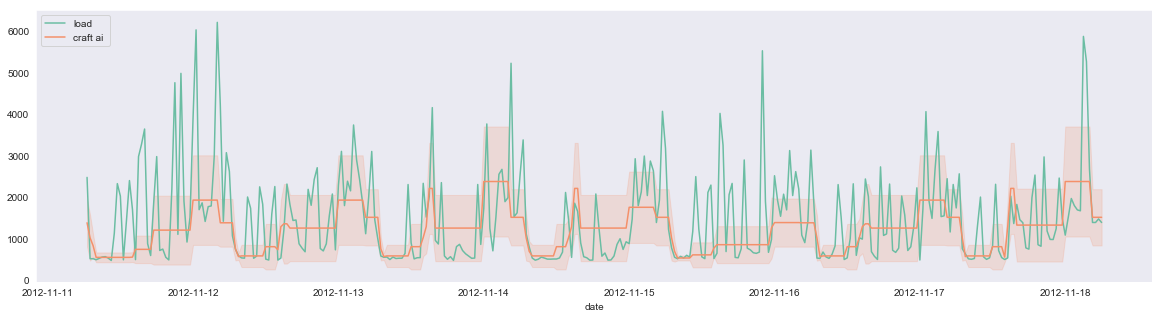

Model predictions for week n° 33


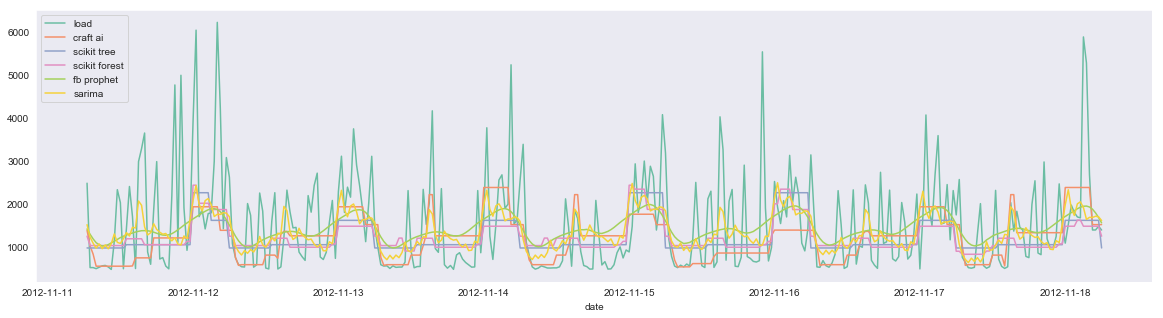

                 mae   mape    rmse        r2  week
ids                                                
scikit tree    722.0  52.35  1040.0  0.085012    33
scikit forest  718.0  52.98  1031.0  0.099754    33
prophet        739.0  65.20   990.0  0.170668    33
sarima model   675.0  53.50   960.0  0.219897    33
craft ai       675.0  44.17  1021.0  0.118317    33


C:\Users\Claire\AppData\Local\Continuum\anaconda3\envs\energykit\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                 mae   mape   rmse        r2  week
ids                                               
scikit tree    748.0  59.64  967.0  0.002033    34
scikit forest  693.0  52.37  915.0  0.105873    34
prophet        726.0  65.41  892.0  0.150688    34
sarima model   678.0  51.10  898.0  0.138563    34
craft ai       678.0  44.09  949.0  0.037150    34
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    628.0  59.50  794.0  0.108761    35
scikit forest  669.0  63.50  828.0  0.029964    35
prophet        720.0  82.71  814.0  0.062277    35
sarima model   653.0  66.05  798.0  0.099708    35
craft ai       572.0  49.72  793.0  0.110749    35


C:\Users\Claire\AppData\Local\Continuum\anaconda3\envs\energykit\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                 mae   mape    rmse        r2  week
ids                                                
scikit tree    724.0  51.38  1007.0  0.033318    36
scikit forest  704.0  47.39   988.0  0.069134    36
prophet        731.0  61.27   946.0  0.147900    36
sarima model   695.0  50.06   953.0  0.134670    36
craft ai       683.0  40.47   980.0  0.084234    36


C:\Users\Claire\AppData\Local\Continuum\anaconda3\envs\energykit\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                 mae    mape   rmse        r2  week
ids                                                
scikit tree    592.0   69.85  706.0  0.107441    37
scikit forest  881.0  116.18  956.0 -0.637758    37
prophet        731.0   93.39  825.0 -0.219449    37
sarima model   625.0   74.90  751.0 -0.010168    37
craft ai       432.0   41.77  661.0  0.217597    37


C:\Users\Claire\AppData\Local\Continuum\anaconda3\envs\energykit\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                 mae   mape   rmse        r2  week
ids                                               
scikit tree    603.0  60.23  863.0  0.142568    38
scikit forest  547.0  52.11  837.0  0.192709    38
prophet        624.0  67.58  862.0  0.144481    38
sarima model   587.0  58.83  860.0  0.149211    38
craft ai       496.0  39.27  860.0  0.148773    38
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    614.0  68.49  786.0  0.133092    39
scikit forest  563.0  59.88  757.0  0.195683    39
prophet        615.0  71.63  780.0  0.145668    39
sarima model   553.0  60.42  744.0  0.222103    39
craft ai       525.0  54.03  768.0  0.172450    39


C:\Users\Claire\AppData\Local\Continuum\anaconda3\envs\energykit\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                 mae   mape   rmse        r2  week
ids                                               
scikit tree    537.0  50.54  729.0  0.141720    40
scikit forest  517.0  46.30  723.0  0.156449    40
prophet        467.0  44.79  654.0  0.308296    40
sarima model   426.0  36.98  619.0  0.381739    40
craft ai       397.0  29.57  642.0  0.334358    40
Craft ai predictions for week n° 41


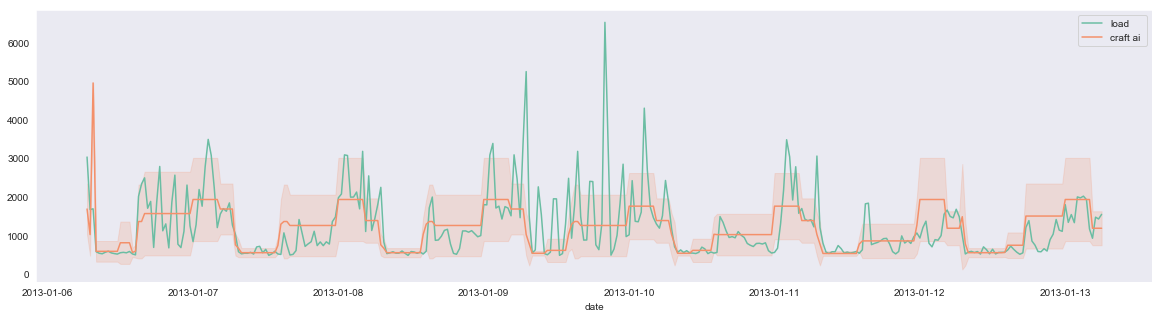

Model predictions for week n° 41


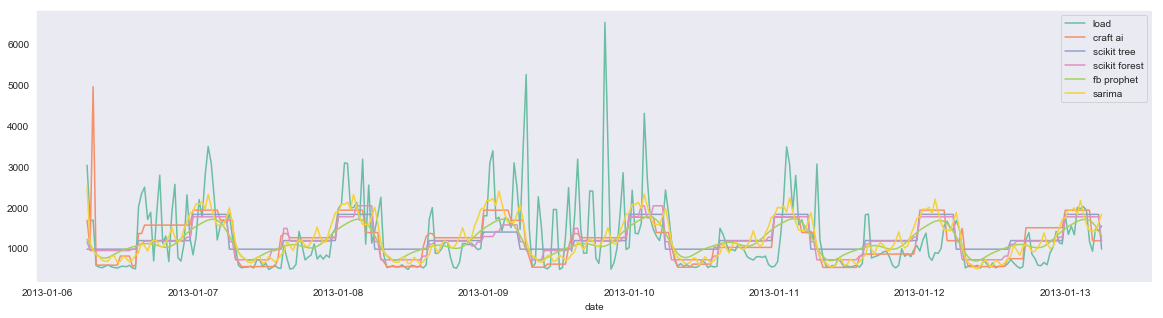

                 mae   mape   rmse        r2  week
ids                                               
scikit tree    540.0  52.27  751.0  0.162248    41
scikit forest  484.0  42.54  729.0  0.211547    41
prophet        470.0  41.88  721.0  0.227774    41
sarima model   437.0  37.70  684.0  0.304983    41
craft ai       429.0  35.00  715.0  0.242286    41
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    479.0  47.63  697.0  0.236098    42
scikit forest  398.0  33.76  665.0  0.303367    42
prophet        410.0  35.25  682.0  0.267837    42
sarima model   360.0  28.68  649.0  0.337504    42
craft ai       372.0  26.52  685.0  0.260643    42
                 mae   mape   rmse        r2  week
ids                                               
scikit tree    572.0  48.82  780.0  0.128277    43
scikit forest  517.0  40.31  768.0  0.155980    43
prophet        524.0  38.07  786.0  0.115310    43
sarima model   516.0  39.84  76

In [ ]:
week_unit = 7*24*2 #nombre de demi-heures dans une semaine
week_index = 8
max_week_index = data.shape[0]/(7*24*2)
#max_week_index =9
idx = ['scikit tree', 'scikit forest', 'prophet', 'sarima model', 'craft ai']
scores = []
while week_index < max_week_index:
    last_train_index = week_index * week_unit
    last_test_index = (week_index +1) * week_unit
    week_preds = {}
    
    #compute craft ai preds 
    craft_preds = abt.get_craft_preds(stop_train=last_train_index, start_pred=last_train_index, stop_pred=last_test_index, node_file = "load_benchmark_ampds_depth7")
    crp = craft_preds['predictedLoad']
    week_preds['craft ai'] = crp
    
    #compute and store other models' preds  
    data_train, data_test = abt.split_data(data, last_train_index-1 , last_test_index-1)
    
    sk_tree_preds = abt.get_scikit_preds(data_train, data_test)
    week_preds['scikit tree'] = sk_tree_preds
    
    forest_preds = abt.get_forest_preds(data_train, data_test)
    week_preds['scikit forest'] = forest_preds
    
    prophet_preds = abt.get_prophet_preds(data_train, data_test)
    week_preds['fb prophet'] = prophet_preds
    try:
        sarima_preds = abt.get_sarima_preds(data_train, data_test,week_unit, max_feed=3000)
        week_preds['sarima'] = sarima_preds
    except MemoryError:
        print("Memory error for sarima preds on week", week_index)
        sarima_preds = []
        continue
        
    #get scores for the current week
    frame = abt.get_models_scores(data_test=data_test,
                      predictions=[sk_tree_preds, forest_preds, prophet_preds, sarima_preds, crp], 
                      idx = ['scikit tree', 'scikit forest', 'prophet', 'sarima model', 'craft ai'])
    frame['week'] = week_index +1 
    scores.append(frame)
    
    with open('scores.pickle', 'wb') as f:
        # Pickle the score array so that we can retrieve the scores if the prog fails
        pickle.dump(scores, f, pickle.HIGHEST_PROTOCOL)
    
    #once in a while, print our predictions to see how they compare to each other and to the real values
    if (week_index%8 ==0):
        std = craft_preds['standardDeviation']
        
        print("Craft ai predictions for week n° {}".format(week_index+1))
        abt.plot_period_predictions(data_test.drop('temp',1), 
                                        predictions = {'craft ai ':crp}, 
                                        standardDev = True,
                                        low_val = crp - std,
                                        upper_val = crp + std)
        
        print("Model predictions for week n° {}".format(week_index+1))
        abt.plot_period_predictions(data_test=data_test.drop('temp',1),
                                    predictions = week_preds)
    #print scores 
    print(frame)
    #update index
    week_index +=1

In [10]:
with open('scores.pickle', 'rb') as f:
    scores_loaded = pickle.load(f)

### Scores finaux 

In [16]:
final_table = scores[0]
for score in scores[1:]:
    final_table = pd.concat([final_table, score],0)

In [19]:
final_table = final_table.set_index(['ids', 'week'])

In [21]:
final_table.groupby(by='ids').mean()

,mae,mape,rmse,r2
ids,,,,
craft ai,461.583333,44.041042,692.583333,0.154025
prophet,465.333333,45.890000,691.208333,0.152944
sarima model,437.104167,40.764375,677.208333,0.185087
scikit forest,450.489583,42.672917,689.239583,0.155155
scikit tree,458.843750,43.850104,692.166667,0.153689
